<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos-2024/blob/main/Tarea%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tarea #2

### Analisis de sentimiento

#### Requisitos

Elegir un conjunto de datos de reseñas de usuarios (por ejemplo, [Reseñas de Amazon](https://github.com/SinghalHarsh/amazon-product-review-scraper), entre [otros](https://www.kaggle.com/datasets?tags=16302-Ratings+and+Reviews)).

Elegir un método de vectorización adecuado para el conjunto de datos elegido, aplicarlo y estudiar las propiedades de los vectores obtenidos.

Realizar el preprocesamiento necesario para realizar un análisis de sentimiento que, de ser posible, compare la reseña presentada con alguna calificación numérica elegida.

Escribir un reporte con los hallazgos, metodología y resultados en PDF y subirlo en una sección claramente identificable de tu repositorio.

#### Calificación

Se califica con 10 puntos quien cumple con los requisitos.

Seleccionamos una base de Kaggle con mas de 200,000 tweets que hablen a cerca de ChatGPT

**ChatGPT y su Relevancia en la Actualidad**

ChatGPT, desarrollado por OpenAI, es un avanzado modelo de lenguaje que utiliza inteligencia artificial para entender y generar texto humano de manera coherente. Basado en la arquitectura GPT (Generative Pre-trained Transformer), ChatGPT puede mantener conversaciones naturales, generar contenido creativo, y asistir en tareas diversas como la programación y la investigación.

**Relevancia Actual:**

1. **Avances en IA:** Representa un progreso significativo en inteligencia artificial y procesamiento del lenguaje natural.
2. **Productividad:** Mejora la eficiencia automatizando tareas repetitivas y proporcionando asistencia instantánea.
3. **Accesibilidad:** Facilita el acceso rápido y preciso a la información y el conocimiento.
4. **Innovación:** Impulsa el desarrollo de nuevas aplicaciones y herramientas tecnológicas.

En resumen, ChatGPT es una herramienta crucial en la era digital, mejorando nuestra interacción con la tecnología y potenciando la productividad y creatividad.

In [182]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re
from collections import Counter
from datetime import datetime

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import matplotlib.dates as mdates
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [183]:
# Lectura de datos
# ==============================================================================
df = pd.read_csv('chatgpt2.csv')
df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1598010000000000000,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1598010000000000000,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1598010000000000000,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1598020000000000000,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1598020000000000000,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tweet_id       219294 non-null  int64 
 1   created_at     219294 non-null  object
 2   like_count     219294 non-null  int64 
 3   quote_count    219294 non-null  int64 
 4   reply_count    219294 non-null  int64 
 5   retweet_count  219294 non-null  int64 
 6   tweet          219294 non-null  object
 7   country        3648 non-null    object
 8   photo_url      68446 non-null   object
 9   city           3648 non-null    object
 10  country_code   3645 non-null    object
dtypes: int64(5), object(6)
memory usage: 18.4+ MB


In [185]:
# Se seleccionan y renombran las columnas de interés
tweets = df[['created_at', 'tweet','tweet_id']]
tweets.columns = ['fecha', 'texto','id']

# Parseo de fechas
tweets['fecha'] = pd.to_datetime(tweets['fecha'], infer_datetime_format=True)
tweets['fecha'] = tweets['fecha'].dt.strftime('%Y-%m-%d')
tweets.head(3)

,fecha,texto,id
0,2022-11-30,ChatGPT: Optimizing Language Models for Dialog...,1598010000000000000
1,2022-11-30,"Try talking with ChatGPT, our new AI system wh...",1598010000000000000
2,2022-11-30,ChatGPT: Optimizing Language Models for Dialog...,1598010000000000000


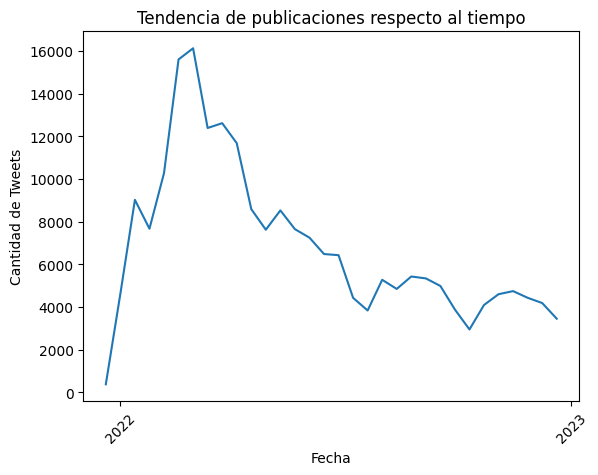

In [186]:
# Distribución temporal de los tweets
# ==============================================================================
conteo_tweets = Counter(tweets.fecha)

# Obtener las fechas y la cantidad de tweets
fechas_unicas = sorted(conteo_tweets.keys())
cantidad_tweets = [conteo_tweets[fecha] for fecha in fechas_unicas]
fechas_unicas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas_unicas]

# Crear el gráfico
plt.plot(fechas_unicas, cantidad_tweets)

# Configurar el formateo del eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.title('Tendencia de publicaciones respecto al tiempo')
plt.xticks(rotation=45)  # Girar las etiquetas del eje x para mayor legibilidad
plt.show()

In [187]:
import re

def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub(r'http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = r'[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^_\`\{\|\}\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub(r'\d+', ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub(r'\s+', ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep=' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return nuevo_texto

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"
print(test)
print(limpiar_tokenizar(texto=test))

Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining
['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'cienciadedatos', 'textmining']


In [188]:
# Se aplica la función de limpieza y tokenización a cada tweet
# ==============================================================================
tweets['texto_tokenizado'] = tweets['texto'].apply(lambda x: limpiar_tokenizar(x))
tweets[['texto', 'texto_tokenizado']].head()

,texto,texto_tokenizado
0,ChatGPT: Optimizing Language Models for Dialog...,"[chatgpt, optimizing, language, models, for, d..."
1,"Try talking with ChatGPT, our new AI system wh...","[try, talking, with, chatgpt, our, new, ai, sy..."
2,ChatGPT: Optimizing Language Models for Dialog...,"[chatgpt, optimizing, language, models, for, d..."
3,"THRILLED to share that ChatGPT, our new model ...","[thrilled, to, share, that, chatgpt, our, new,..."
4,"As of 2 minutes ago, @OpenAI released their ne...","[as, of, minutes, ago, openai, released, their..."


In [189]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
tweets_tidy = tweets.explode(column='texto_tokenizado')
tweets_tidy = tweets_tidy.drop(columns='texto')
tweets_tidy = tweets_tidy.rename(columns={'texto_tokenizado':'token'})
tweets_tidy.head(3)

,fecha,id,token
0,2022-11-30,1598010000000000000,chatgpt
0,2022-11-30,1598010000000000000,optimizing
0,2022-11-30,1598010000000000000,language


In [190]:
temp_df = pd.DataFrame(tweets_tidy.groupby("id")["token"].count())
mean_length = temp_df["token"].mean()
std_length = temp_df["token"].std()

print("Longitud media de los tweets:", mean_length)
print("Desviación de los tweets:", std_length)

Longitud media de los tweets: 3824.7231040564375
Desviación de los tweets: 2103.7396134115033


In [203]:
from collections import Counter
from itertools import islice

# Función para obtener n-gramas
def obtener_ngrams(token_list, n):
    return zip(*[islice(token_list, i, None) for i in range(n)])

# Obtener bigramas y trigramas por tweet
tweets['bigrams'] = tweets['texto_tokenizado'].apply(lambda x: list(obtener_ngrams(x, 2)))
tweets['trigrams'] = tweets['texto_tokenizado'].apply(lambda x: list(obtener_ngrams(x, 3)))

# Concatenar todos los bigramas y trigramas en listas planas
all_bigrams = [bigram for bigrams in tweets['bigrams'] for bigram in bigrams]
all_trigrams = [trigram for trigrams in tweets['trigrams'] for trigram in trigrams]

# Contar bigramas y trigramas
bigram_counter = Counter(all_bigrams)
trigram_counter = Counter(all_trigrams)

# Obtener los bigramas y trigramas más comunes
bigramas_mas_comunes = bigram_counter.most_common(1)
trigramas_mas_comunes = trigram_counter.most_common(1)

print("Bigramas más comunes:", bigramas_mas_comunes)
print("Trigramas más comunes:", trigramas_mas_comunes)

Bigramas más comunes: [(('chatgpt', 'is'), 25073)]
Trigramas más comunes: [(('chatgpt', 'to', 'write'), 4594)]


In [191]:
nltk.download('stopwords')
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
# Filtrado para excluir stopwords
# ==============================================================================
tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

In [193]:
# Descarga lexicon sentimientos
# ==============================================================================
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [198]:
# Sentimiento promedio de cada tweet
# ==============================================================================
tweets_sentimientos = pd.merge(
                            left     = tweets_tidy,
                            right    = lexicon,
                            left_on  = "token",
                            right_on = "termino",
                            how      = "inner"
                      )

tweets_sentimientos = tweets_sentimientos.drop(columns = "termino")

tweets_sentimientos


,fecha,id,token,sentimiento
0,2022-11-30,1598010000000000000,help,2
1,2022-11-30,1598020000000000000,help,2
2,2022-11-30,1598020000000000000,help,2
3,2022-11-30,1598020000000000000,help,2
4,2022-11-30,1598020000000000000,help,2
...,...,...,...,...
272300,2022-12-31,1609000000000000000,adored,3
272301,2022-12-31,1609000000000000000,regretful,-2
272302,2022-12-31,1609090000000000000,glum,-2
272303,2022-12-31,1609130000000000000,unforgiving,-2


In [199]:
print(f"Positivos: {round(100 * np.mean(tweets_sentimientos.sentimiento > 0), 2)}")
print(f"Neutros  : {round(100 * np.mean(tweets_sentimientos.sentimiento == 0), 2)}")
print(f"Negativos: {round(100 * np.mean(tweets_sentimientos.sentimiento < 0), 2)}")

Positivos: 68.43
Neutros  : 0.0
Negativos: 31.57


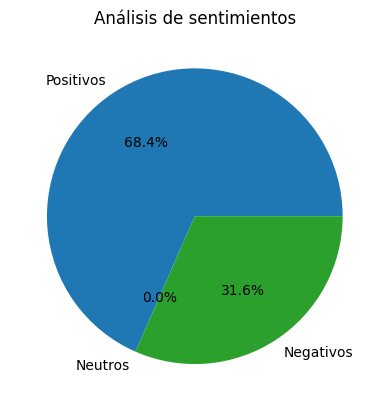

In [200]:
positivos = round(100 * np.mean(tweets_sentimientos.sentimiento > 0), 2)
neutros = round(100 * np.mean(tweets_sentimientos.sentimiento == 0), 2)
negativos = round(100 * np.mean(tweets_sentimientos.sentimiento < 0), 2)

resultados = [positivos, neutros, negativos]
etiquetas = ['Positivos', 'Neutros', 'Negativos']

# Crear el gráfico de barras
plt.pie(resultados, labels=etiquetas, autopct='%1.1f%%')
plt.title('Análisis de sentimientos')
plt.show()

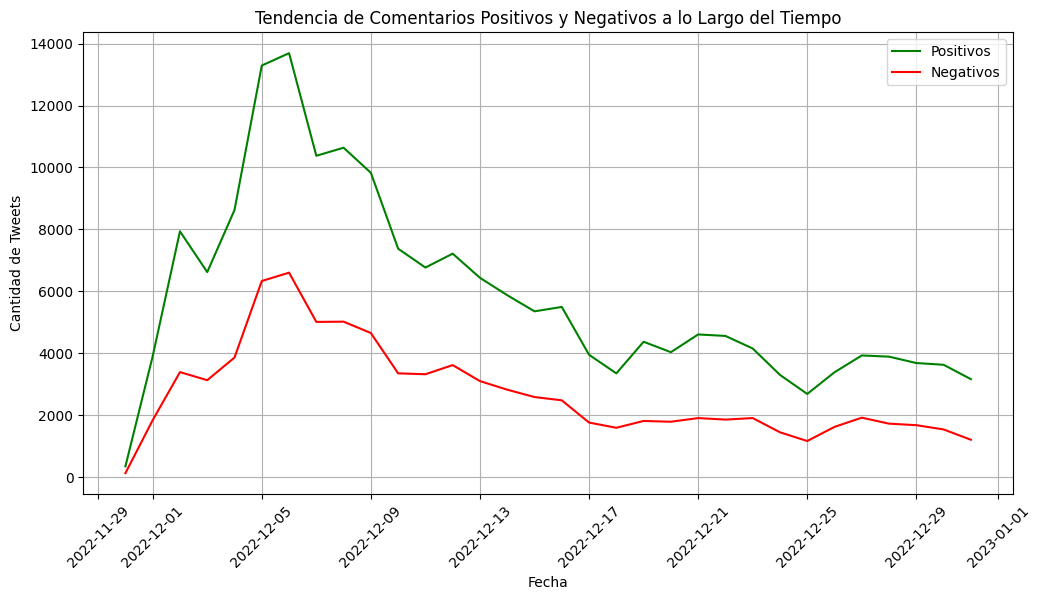

In [204]:
# Agregar columna para identificar tweets positivos y negativos
tweets_sentimientos['positivo'] = tweets_sentimientos['sentimiento'] > 0
tweets_sentimientos['negativo'] = tweets_sentimientos['sentimiento'] < 0

# Agrupar por fecha y calcular la suma de sentimientos positivos y negativos
sentimientos_diarios = tweets_sentimientos.groupby('fecha').agg({
    'positivo': 'sum',
    'negativo': 'sum'
}).reset_index()

# Convertir las fechas nuevamente a objetos datetime para graficar
sentimientos_diarios['fecha'] = pd.to_datetime(sentimientos_diarios['fecha'])

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(sentimientos_diarios['fecha'], sentimientos_diarios['positivo'], label='Positivos', color='g')
plt.plot(sentimientos_diarios['fecha'], sentimientos_diarios['negativo'], label='Negativos', color='r')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.title('Tendencia de Comentarios Positivos y Negativos a lo Largo del Tiempo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()